# SARSA vs Q-Learning
On-Polic vs Off-Policy

## SARSA :
**On-policy TD** 
$$Q(S_t,A_t) \leftarrow Q(s_t,a_t) +\alpha[R_{t+1} + \gamma*Q(S_{t+1},A_{t+1} ) - Q(S_t,A_t)]$$
## Q-Learning
**Off-policy TD**
$$Q(S_t,A_t) \leftarrow Q(s_t,a_t) +\alpha[R_{t+1} + \gamma*maxQ(S_{t+1},A_{t+1} ) - Q(S_t,A_t)]$$

**Difference:**
SARSA is better than Q learning as it converges faster than Qlearning

## Lets start with **SARSA** Implementation
#### State-Action-Reward-State-Action

In [50]:
# imports

import gym
import numpy as np
import matplotlib.pyplot as plt

In [51]:
alpha = 0.1
gamma = 0.99
epsilon = 0.5
epsilon_decay = 0.999
verbose = False

In [61]:
def epsilon_greedy(state): 
    action=0
    if np.random.uniform(0, 1) < epsilon: 
        action = env.action_space.sample() 
    else: 
        action = np.argmax(Q[state, :]) 
    return action 

# ## Computing the SARSA update
# def sarsa_update(q, s, a, r, s_prime, a_prime):
#     target =(r + gamma * q[s_prime, a_prime] )- q[s, a]
#     q[s, a] = q[s, a] + alpha * target
#Function to learn the Q-value 
def sarsa_update(state, state2, reward, action, action2): 
    predict = Q[state, action] 
    target = reward + gamma * Q[state2, action2] 
    Q[state, action] = Q[state, action] + alpha * (target - predict) 

In [62]:
env = gym.make("FrozenLake-v0")

steps = 100
# eval_steps = 10

# Init Q-table
Q = np.zeros((env.observation_space.n, env.action_space.n)) 

In [64]:
n_episodes = 10000
total_rewards = []

for episode in range(n_episodes):
    
    # total reward
    t_reward = 0
    
    # start the env
    state1 = env.reset() 
    
    # take an action from e greeady
    action1 = epsilon_greedy(state1) 
    
    
    for i in range(steps):
            
        # env feedback
        state2, reward, done, info = env.step(action1) 

        # next action

        action2 = choose_action(state2) 

        # update q table
        update(state1, state2, reward, action1, action2) 

        # next state 
        state1 = state2 
        action1 = action2
        t_reward+=1
        
        if done:
            break
    total_rewards.append(t_reward)
    epsilon = epsilon * epsilon_decay 

[]

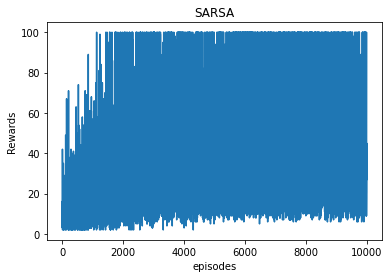

In [105]:
## plotting the results

plt.plot(total_rewards)
plt.xlabel("episodes")
plt.ylabel("Rewards")
plt.title("SARSA")
plt.plot()

## Qlearning

In [76]:
# Hypteparameters
discount_factor = 0.99 # gamma
learning_rate = 0.1 #0.15  # alpha
epsilon = 0.2 # epsilon greedy
epsilon_decay = 0.999
# environment
env = gym.make('FrozenLake-v0') 

In [91]:
import random
from IPython.display import clear_output

rewards_Q=[]

steps = 200
num_episodes=10000


# Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

for episode in range(num_episodes):
    
    state= env.reset()

#     done=False
    episode_reward = 0
    
    # epsilon greedy
    if random.uniform(0,1) > epsilon:
        # explore
        action = env.action_space.sample()
    else:
        # exploit 
        action = np.argmax(Q[state])
    
    for i in range(steps):

        # to update the  Q function we need current and next state
        next_state, reward,done, _ = env.step(action)

        # Q-Table
        learned_value = reward + discount_factor * np.max(Q[next_state,:])
        old_value = Q[state, action]

        new_value = old_value + learning_rate * (learned_value-old_value)
        Q[state,action] = new_value

        episode_reward +=1
        state = next_state
        if done:
            break
    rewards_Q.append(episode_reward)
    epsilon = epsilon * epsilon_decay 
print("training finished")

training finished


Text(0.5, 1.0, 'Qlearning')

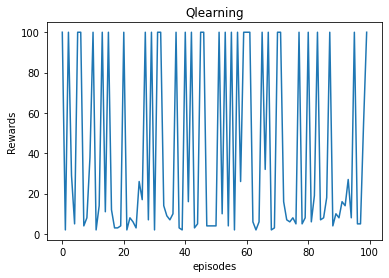

In [106]:
plt.plot(rewards_Q[:100])
plt.xlabel("episodes")
plt.ylabel("Rewards")
plt.title("Qlearning")

Text(0.5, 1.0, 'Qlearning')

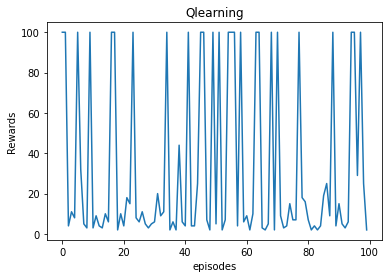

In [107]:
plt.plot(rewards_Q[9900:])
plt.xlabel("episodes")
plt.ylabel("Rewards")
plt.title("Qlearning")

Text(0.5, 1.0, 'Qlearning')

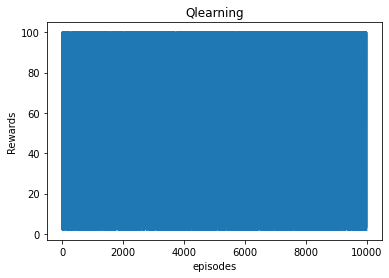

In [108]:
plt.plot(rewards_Q)
plt.xlabel("episodes")
plt.ylabel("Rewards")
plt.title("Qlearning")

## Here we can see that Q learning is really fast in learning and adapting in this deterministic environment

## Conclusion:
- **SARSA** is typically preferable in situations where we care about the agent's performance during the process of learning and generating experience. For example, the car will damage if it crashes on the sides.
- **Q-learning** is preferred in situations where we do not care about the agent's performance during the training process, but we just want it to learn an optimal greedy policy that we eventually want to switch to. For example, that we play a few practice games (where we don't mind losing due to randomness sometimes), and afterwards play an important tournament (where we'll stop learning and switch over from epsilon-greedy to the greedy policy). In such situations Q-learning would be better.

## Resources
1. https://stackoverflow.com/questions/6848828/what-is-the-difference-between-q-learning-and-sarsa
1. https://www.quora.com/What-is-the-difference-between-Q-learning-and-SARSA-learning 